In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb
%matplotlib inline

In [2]:
 dtypes={"Gender":"category","Customer Type":"category","Type of Travel":"category",
        "Class":"category","Satisfaction":"category","Arrival Delay":"Int16",
        "ID":"Int64","Flight Distance":"Int16","Departure Delay":"Int16","Age":"Int8"}
orig_dtypes=dtypes.copy()
# many types are numberes from 0 to 5 so we don't need int64 even with age
cols=pd.read_csv(os.path.join("Airline+Passenger+Satisfaction","airline_passenger_satisfaction.csv"),nrows=0).columns
for col in cols:
    if col not in dtypes:
        dtypes[col]="Int8"  
passengers=pd.read_csv(os.path.join("Airline+Passenger+Satisfaction","airline_passenger_satisfaction.csv"),
       dtype=dtypes         )
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   ID                                      129880 non-null  Int64   
 1   Gender                                  129880 non-null  category
 2   Age                                     129880 non-null  Int8    
 3   Customer Type                           129880 non-null  category
 4   Type of Travel                          129880 non-null  category
 5   Class                                   129880 non-null  category
 6   Flight Distance                         129880 non-null  Int16   
 7   Departure Delay                         129880 non-null  Int16   
 8   Arrival Delay                           129487 non-null  Int16   
 9   Departure and Arrival Time Convenience  129880 non-null  Int8    
 10  Ease of Online Booking          

In [3]:
ranged_satisfaction_cols=["Departure and Arrival Time Convenience","Ease of Online Booking",\
"Check-in Service","Online Boarding","Gate Location","On-board Service","Seat Comfort",\
"Leg Room Service","Cleanliness","Food and Drink","In-flight Service","In-flight Wifi Service",\
"In-flight Entertainment","Baggage Handling"]

In [4]:
#cleaning data and prearing it 
passengers["ID"].min(),passengers["ID"].max()

(1, 129880)

In [5]:
passengers["Gender"].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [6]:
passengers["Age"].min(),passengers["Age"].max()

(7, 85)

In [7]:
passengers["Customer Type"].unique(),passengers["Type of Travel"].unique()

(['First-time', 'Returning']
 Categories (2, object): ['First-time', 'Returning'],
 ['Business', 'Personal']
 Categories (2, object): ['Business', 'Personal'])

In [8]:
passengers["Class"].unique()

['Business', 'Economy', 'Economy Plus']
Categories (3, object): ['Business', 'Economy', 'Economy Plus']

In [9]:
#flight distance in miles
passengers["Flight Distance"].min(),passengers["Flight Distance"].max()

(31, 4983)

In [10]:
# a problem flight distance can't be 31 miles for a plane
passengers.loc[passengers["Flight Distance"] < 200,"Flight Distance"]=np.int16(200)
passengers["Flight Distance"].min()

200

In [11]:
passengers["Departure Delay"].min(),passengers["Departure Delay"].max()

(0, 1592)

In [12]:
passengers["Arrival Delay"].min(),passengers["Arrival Delay"].max()

(0, 1584)

In [13]:
passengers["Departure and Arrival Time Convenience"].min(),passengers["Departure and Arrival Time Convenience"].max()

(0, 5)

In [14]:
passengers["Satisfaction"].unique()

['Neutral or Dissatisfied', 'Satisfied']
Categories (2, object): ['Neutral or Dissatisfied', 'Satisfied']

In [15]:
passengers.loc[passengers["Satisfaction"]==200,"Satisfaction"]=\
np.random.choice(["Neutral or Dissatisfied","Satisfied"],size=(1))[0]

In [16]:
passengers["Satisfaction"].unique()

['Neutral or Dissatisfied', 'Satisfied']
Categories (2, object): ['Neutral or Dissatisfied', 'Satisfied']

In [17]:
#the other fields are between 0 to 5 inclusive
for col in cols:
    #orig dtypes doesn't have the ones we change
    if col not in orig_dtypes:
        passengers.loc[~passengers[col].isin([0,1,2,3,4,5]),col]=np.random.choice([0,1,2,3,4,5],size=(1))[0]

In [18]:
passengers["Seat Comfort"].max()

5

In [19]:
passengers.pivot_table(index="Class",values=["Flight Distance","Seat Comfort","Cleanliness","Food and Drink"])

,Cleanliness,Flight Distance,Food and Drink,Seat Comfort
Class,,,,
Business,3.481998,1678.08639,3.329955,3.763707
Economy,3.104821,749.460684,3.086556,3.141813
Economy Plus,3.118478,752.815429,3.110403,3.168207


Text(0.5, 1.0, 'passengers ages')

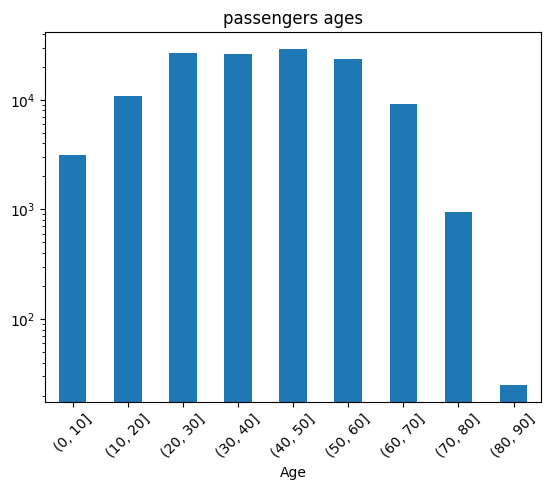

In [20]:
age_groupes=pd.cut(passengers["Age"],bins=[0,10,20,30,40,50,60,70,80,90]).value_counts()
age_groupes.sort_index().plot(kind="bar",logy=True)
plt.xticks(rotation=45)
plt.title("passengers ages")

Text(0.5, 1.0, 'flight distance proportions')

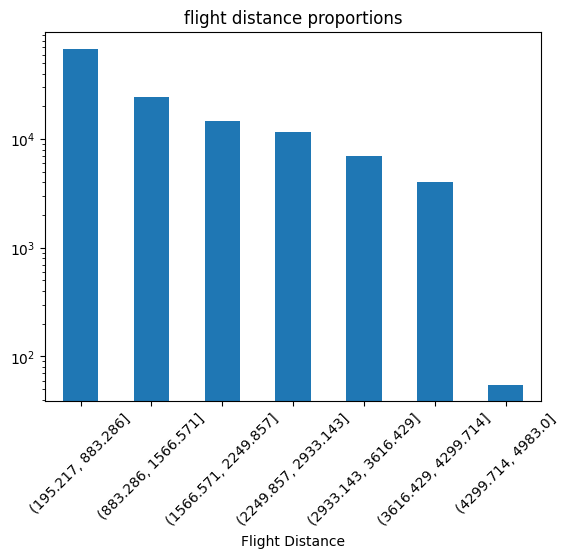

In [21]:
pd.cut(passengers["Flight Distance"],bins=7).value_counts().plot(kind="bar",logy=True)
plt.xticks(rotation=45)
plt.title("flight distance proportions")

Text(0.5, 1.0, 'class satisfaction')

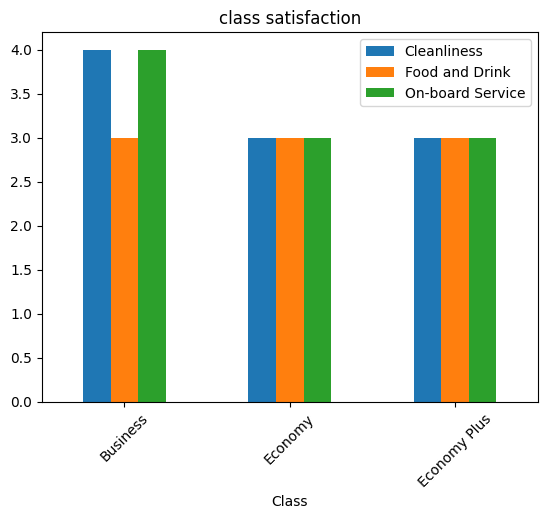

In [22]:
class_satisfaction=passengers.pivot_table(index=["Class"]\
                    ,values=["On-board Service","Food and Drink","Cleanliness"],aggfunc="median")
class_satisfaction.plot(kind="bar")
plt.xticks(rotation=45)
plt.title("class satisfaction")

Text(0.5, 1.0, 'customer type satisfaction')

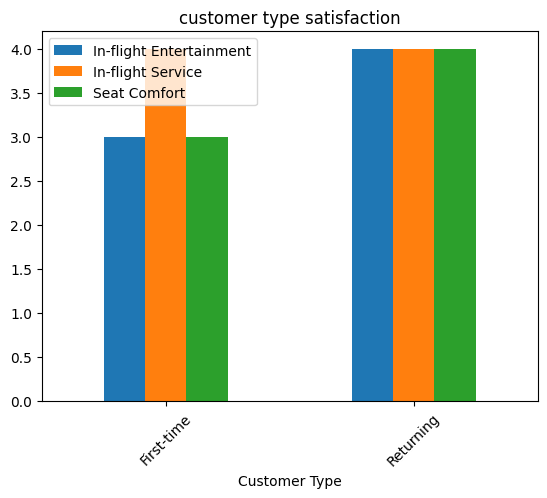

In [23]:
customer_type=passengers.pivot_table(index="Customer Type"\
                ,values=["In-flight Service","In-flight Entertainment","Seat Comfort"],aggfunc="median")
customer_type.plot(kind="bar")
plt.xticks(rotation=45)
plt.title("customer type satisfaction")

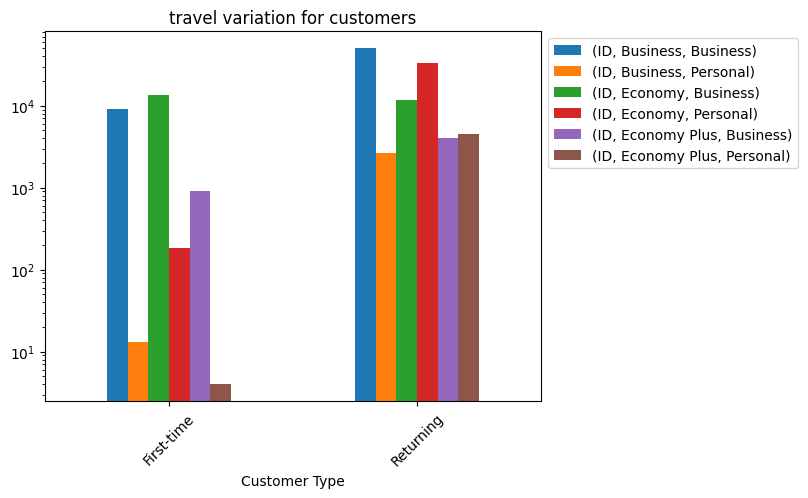

In [50]:
passengers_travel_variations=passengers.pivot_table(index=["Customer Type"],columns=["Class","Type of Travel"],values=["ID"]\
                       ,aggfunc="count")
passengers_travel_variations.plot(kind="bar",logy=True)
plt.legend([ x[1:] for x in passengers_travel_variations.columns]\
           ,title=passengers_travel_variations.columns.names[1:])
plt.xticks(rotation=45)
plt.title("travel variation for customers")
plt.legend(bbox_to_anchor=(1,1))

Text(0, 0.5, 'range of statisfaction')

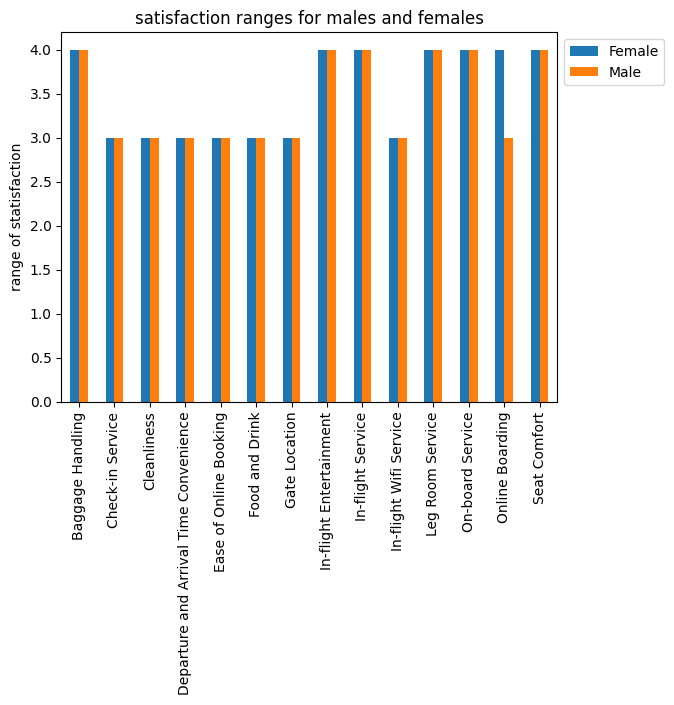

In [25]:
passengers.pivot_table(columns="Gender",\
                       values=ranged_satisfaction_cols,aggfunc="median").plot(kind="bar")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.title("satisfaction ranges for males and females")
plt.ylabel("range of statisfaction")


Text(0.5, 1.0, 'median of satisfaction')

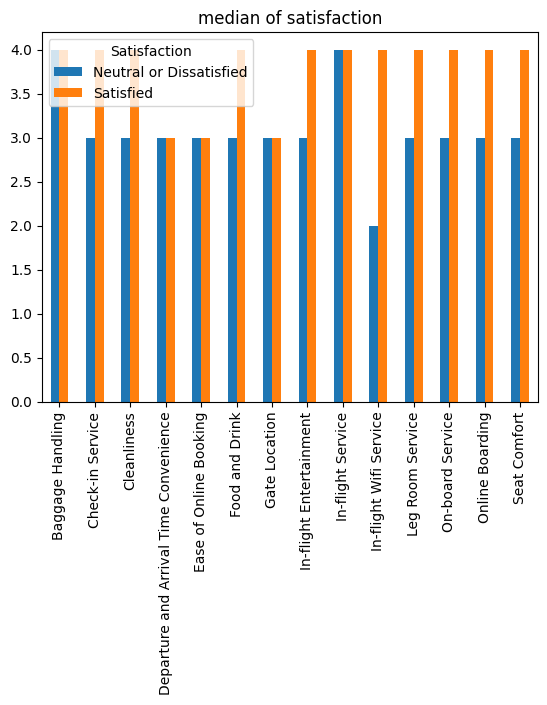

In [26]:
passengers.pivot_table(columns="Satisfaction",values=ranged_satisfaction_cols,\
aggfunc="median").plot(kind="bar")
plt.title("median of satisfaction")

In [27]:
# adding numered satisfaction to see correlation 
def numbering_satisfaction(x):
    """ converse satisfaction to numbers """

    if x=="Neutral or Dissatisfied":
        return np.int8(np.random.choice([0,1,2,3],size=(1))[0])
    return np.int8(np.random.choice([4,5],size=(1))[0])
passengers["Numbered Satisfaction"]=passengers["Satisfaction"].apply(numbering_satisfaction)
        

In [28]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   ID                                      129880 non-null  Int64   
 1   Gender                                  129880 non-null  category
 2   Age                                     129880 non-null  Int8    
 3   Customer Type                           129880 non-null  category
 4   Type of Travel                          129880 non-null  category
 5   Class                                   129880 non-null  category
 6   Flight Distance                         129880 non-null  Int16   
 7   Departure Delay                         129880 non-null  Int16   
 8   Arrival Delay                           129487 non-null  Int16   
 9   Departure and Arrival Time Convenience  129880 non-null  Int8    
 10  Ease of Online Booking          

In [29]:
passengers.pivot_table(index="Numbered Satisfaction",values=ranged_satisfaction_cols,\
aggfunc="corr")

Baggage Handling  \
Numbered Satisfaction                                                            
3                     Departure and Arrival Time Convenience          0.131090   
                      Ease of Online Booking                         -0.058436   
                      Check-in Service                                0.224466   
                      Online Boarding                                -0.100850   
                      Gate Location                                   0.005353   
                      On-board Service                                0.434480   
                      Seat Comfort                                   -0.029128   
                      Leg Room Service                                0.228867   
                      Cleanliness                                     0.045328   
                      Food and Drink                                  0.003422   
                      In-flight Service                               0.607126   
                      In-flight Wifi Service                          0.110297   
                      In-flight Entertainment                         0.257206   
                      Baggage Handling                                1.000000   
4                     Departure and Arrival Time Convenience          0.028538   
                      Ease of Online Booking                          0.056019   
                      Check-in Service                                0.128193   
                      Online Boarding                                 0.019519   
                      Gate Location                                  -0.002670   
                      On-board Service                                0.552645   
                      Seat Comfort                                    0.011655   
                      Leg Room Service                                0.458814   
                      Cleanliness                                    -0.014333   
                      Food and Drink                                 -0.051032   
                      In-flight Service                               0.602317   
                      In-flight Wifi Service                          0.009969   
                      In-flight Entertainment                         0.416239   
                      Baggage Handling                                1.000000   

                                                              Check-in Service  \
Numbered Satisfaction                                                            
3                     Departure and Arrival Time Convenience          0.180411   
                      Ease of Online Booking                         -0.062087   
                      Check-in Service                                1.000000   
                      Online Boarding                                 0.065951   
                      Gate Location                                  -0.061167   
                      On-board Service                                0.228077   
                      Seat Comfort                                    0.098014   
                      Leg Room Service                                0.085144   
                      Cleanliness                                     0.121398   
                      Food and Drink                                  0.043793   
                      In-flight Service                               0.232143   
                      In-flight Wifi Service                          0.005281   
                      In-flight Entertainment                         0.045052   
                      Baggage Handling                                0.224466   
4                     Departure and Arrival Time Convenience          0.006074   
                      Ease of Online Booking                         -0.001290   
                      Check-in Service                                1.000000   
                      Online Boarding      

In [30]:
passengers["Numbered Satisfaction"].value_counts()

Numbered Satisfaction
3    73452
4    56428
Name: count, dtype: int64

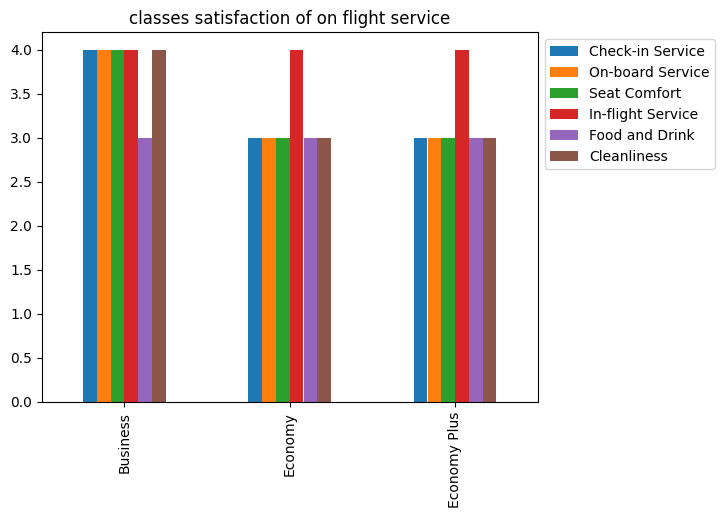

In [31]:
#check flight services for classes
data=[]
classes=passengers["Class"].unique()
flight_services=["Check-in Service","On-board Service","Seat Comfort",\
"In-flight Service","Food and Drink","Cleanliness"]
for cls in classes:
    medians=[ passengers.loc[passengers["Class"]==cls,service].median() for service in flight_services]
    data.append({ k:v for (k,v) in zip(flight_services,medians)})
classes_flight_services=pd.DataFrame(data,index=classes)
classes_flight_services.plot(kind="bar")
plt.title("classes satisfaction of on flight service")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))






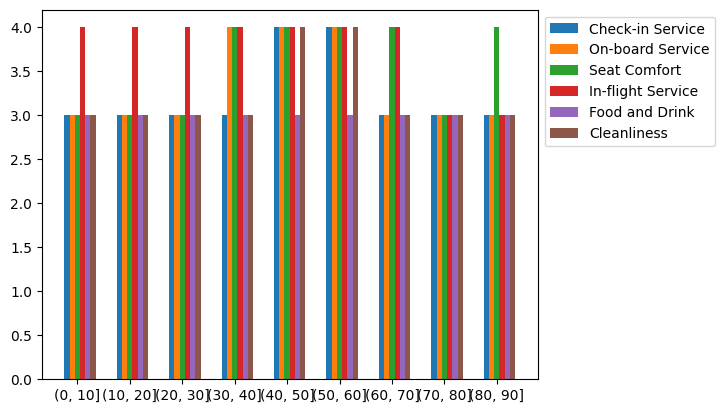

In [32]:
#check flight services satisfaction rates based on age groups
ages=pd.cut(passengers["Age"],bins=np.arange(0,100,10))
sorted_ages=ages.unique().sort_values()
data=[]
for age in sorted_ages:
    data.append([passengers.loc[passengers["Age"].between(age.left,age.right),service].median()\
                 for service in flight_services])
x=np.arange(len(sorted_ages))
bar_width=0.1
fig,axe=plt.subplots()
for idx,service in enumerate(flight_services):
    age_xs=(x+(idx*bar_width))-0.2  # -0.2 to center the bar
    axe.bar(age_xs,[age_data[idx] for age_data in data],bar_width,label=service)
axe.set_xticks(np.arange(len(sorted_ages)),map(str,sorted_ages))
axe.legend(loc="upper left",bbox_to_anchor=(1,1))




In [33]:
flight_distances=pd.cut(passengers["Flight Distance"],7)
passengers.groupby([flight_distances,"Satisfaction"])[["Class","Type of Travel"]].count()

Class  Type of Travel
Flight Distance      Satisfaction                                  
(195.217, 883.286]   Neutral or Dissatisfied  45499           45499
                     Satisfied                22556           22556
(883.286, 1566.571]  Neutral or Dissatisfied  15502           15502
                     Satisfied                 8995            8995
(1566.571, 2249.857] Neutral or Dissatisfied   5818            5818
                     Satisfied                 8889            8889
(2249.857, 2933.143] Neutral or Dissatisfied   4130            4130
                     Satisfied                 7456            7456
(2933.143, 3616.429] Neutral or Dissatisfied   1560            1560
                     Satisfied                 5388            5388
(3616.429, 4299.714] Neutral or Dissatisfied    918             918
                     Satisfied                 3114            3114
(4299.714, 4983.0]   Neutral or Dissatisfied     25              25
                     Satisfied                   30              30

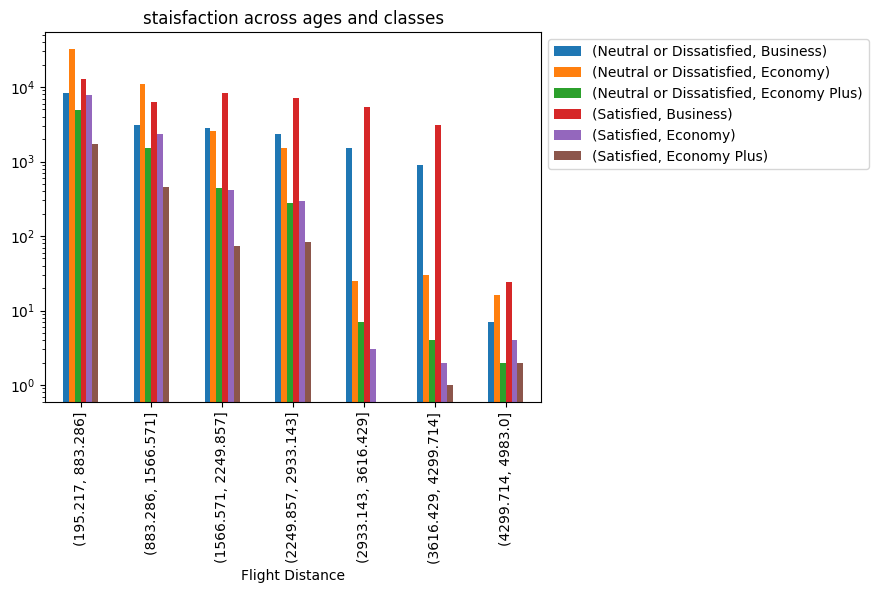

In [34]:
passengers.pivot_table(index=flight_distances,values="ID",\
       columns=["Satisfaction","Class"],aggfunc="count").plot(kind="bar",logy=True)
plt.title("staisfaction across ages and classes")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))

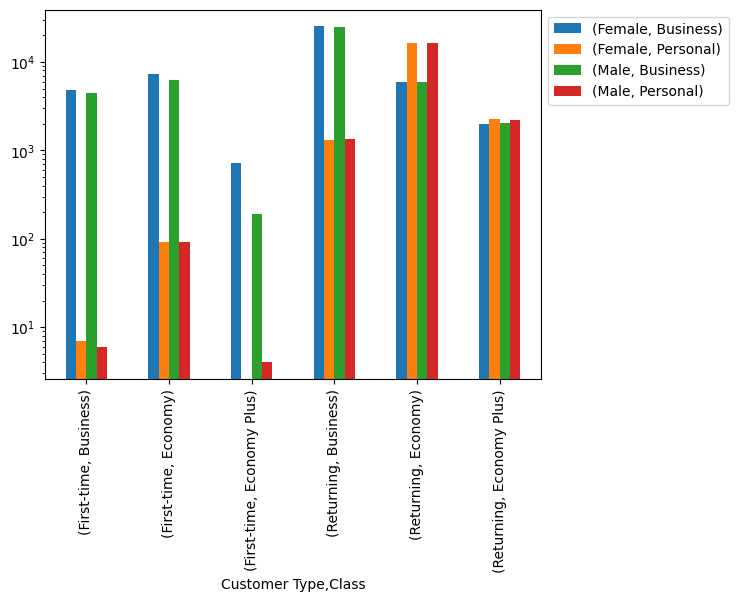

In [47]:
passengers.pivot_table(index=["Customer Type","Class"],values="ID",\
     columns=["Gender","Type of Travel"],aggfunc="count").plot(kind="bar",logy=True)
plt.legend(bbox_to_anchor=(1,1))

<Axes: xlabel='Satisfaction,Customer Type'>

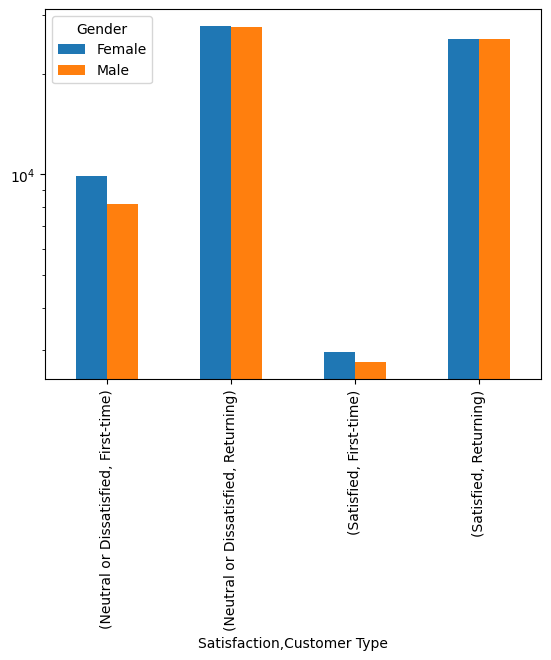

In [49]:
passengers.pivot_table(index=["Satisfaction","Customer Type"],columns=["Gender"],\
        values="ID",aggfunc="count").plot(kind="bar",logy=True)